In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [83]:
n_samples = 128
n_bins = 2  # use 3 bins for calibration_curve as we have 3 clusters here

# Generate 3 blobs with 2 classes where the second blob contains
# half positive samples and half negative samples. Probability in this
# blob is therefore 0.5.
centers = [(-2, -2), (2, 2)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1,
                  centers=centers, shuffle=False, random_state=42)

y[:n_samples // 2] = 0
y[n_samples // 2:] = 1
sample_weight = np.random.RandomState(42).rand(y.shape[0])

# split train, test for calibration
X_train, X_test, y_train, y_test, sw_train, sw_test = \
    train_test_split(X, y, sample_weight, test_size=0.5, random_state=42)


<IPython.core.display.Javascript object>


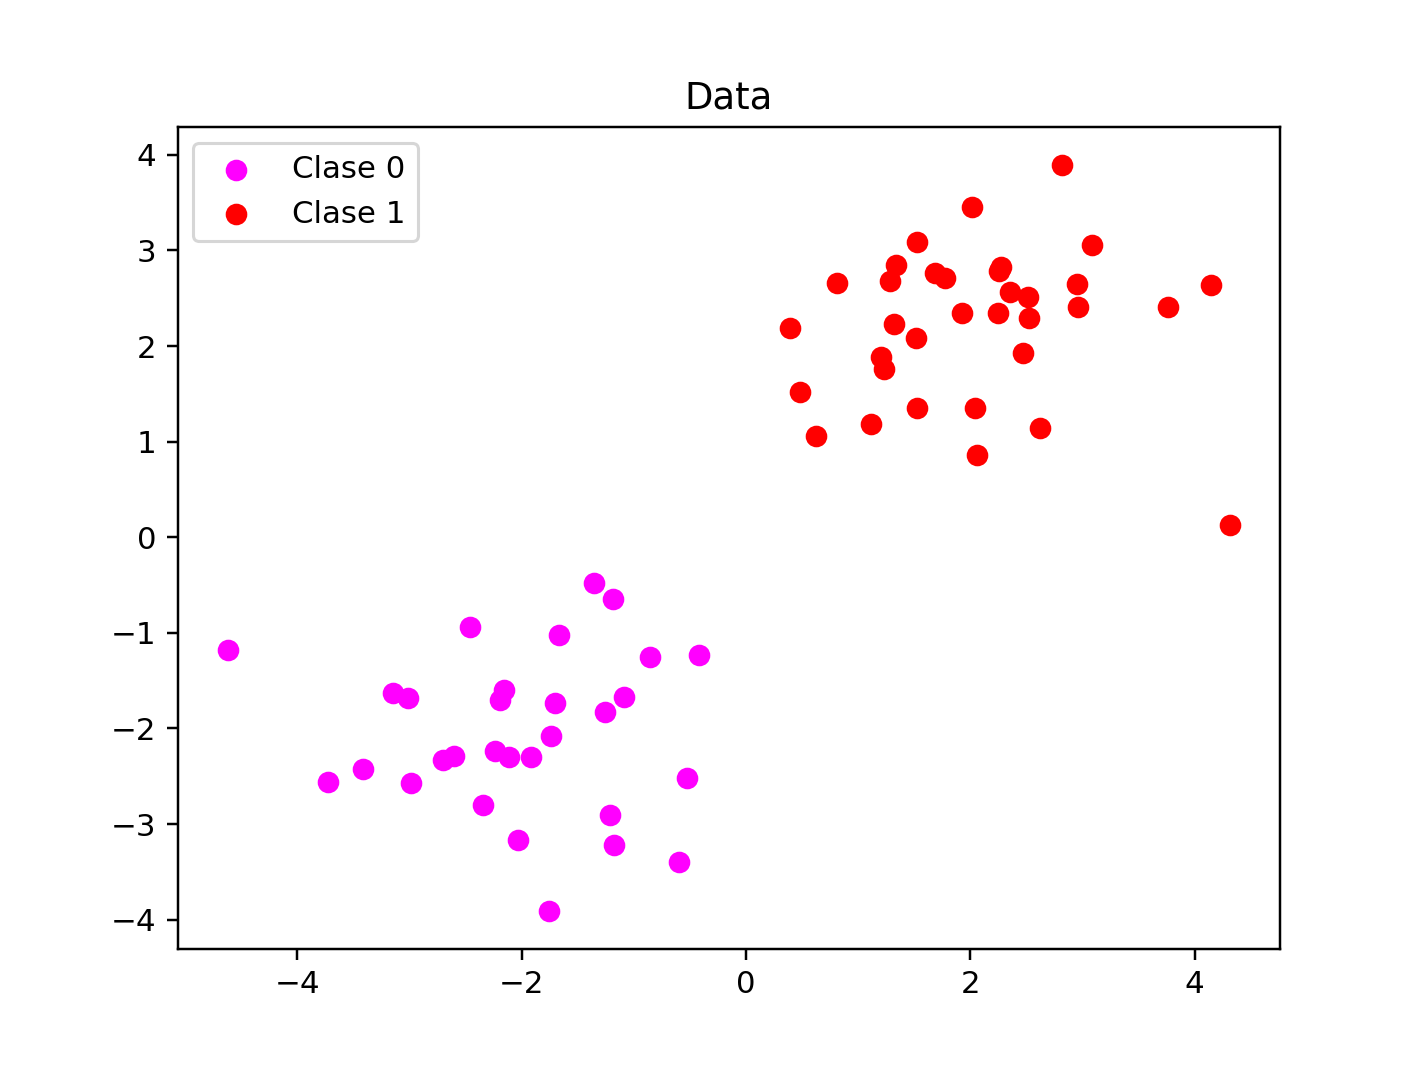

Text(0.5, 1.0, 'Data')

In [84]:
plt.figure()
X1=X_train[y_train == 0]
X2=X_train[y_train == 1]

plt.scatter(X1[:, 0], X1[:, 1], color = 'magenta')
plt.scatter(X2[:, 0], X2[:, 1], color = 'red')
plt.legend(['Clase 0', 'Clase 1'], loc="best")
plt.title("Data")

<IPython.core.display.Javascript object>


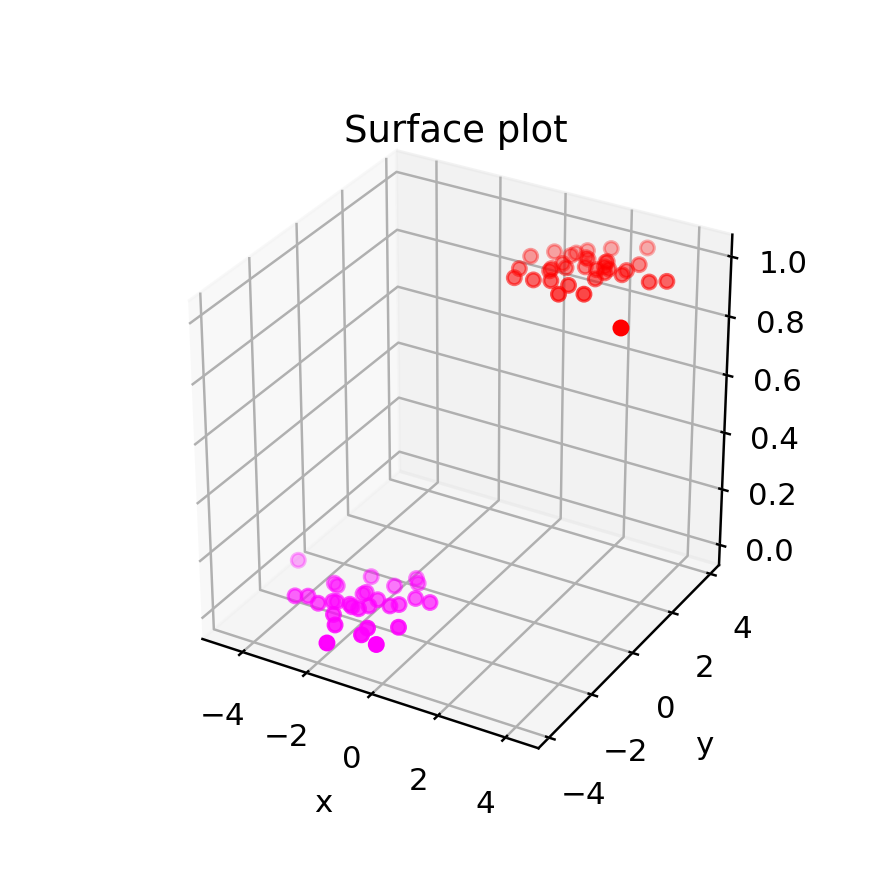

In [85]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
x = X[:,0]
y = X[:,1]

Xm, Ym = np.meshgrid(x, y)

plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')

#ax.plot_surface(Xm, Ym, z,cmap='viridis', edgecolor='none')

X1=X_train[y_train == 0]
X2=X_train[y_train == 1]
y1=y_train[y_train == 0]
y2=y_train[y_train == 1]

ax.scatter(X1[:, 0], X1[:, 1], y1, color = 'magenta')
ax.scatter(X2[:, 0], X2[:, 1], y2, color = 'red')
plt.xlabel('x')
plt.ylabel('y')


ax.set_title('Surface plot')
plt.show()

In [86]:
# assemble matrix A
#A = np.vstack([X_train.T, np.ones(len(X_train))]).T
#A = np.vstack([X_train.T**2, X_train.T, np.ones(len(X_train))]).T
A = np.vstack([X_train.T**3, (X_train[:,0].T**2)*(X_train[:,1].T), (X_train[:,1].T**2)*(X_train[:,0].T), X_train.T**2, X_train.T, np.ones(len(X_train))]).T

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y_train)
print(alpha)


[-0.00244586 -0.00331758 -0.00362604 -0.0137725   0.00308678  0.00431226
  0.15523603  0.20587541  0.46405688]


<IPython.core.display.Javascript object>


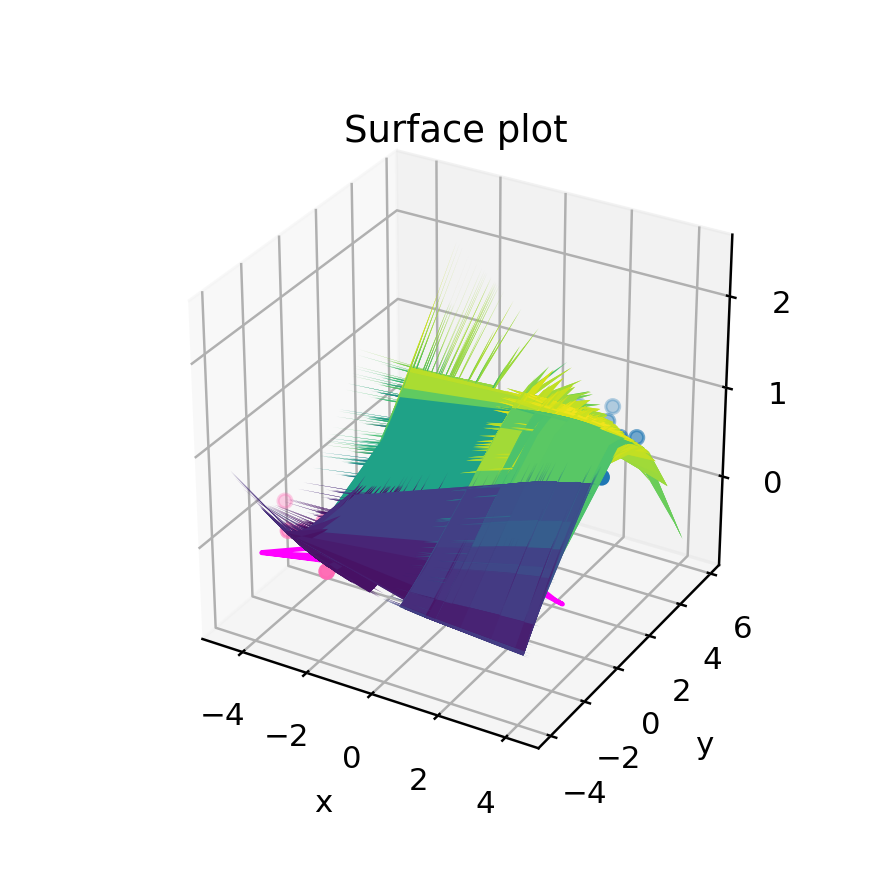

In [88]:
%matplotlib notebook

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
x = X[:,0]
y = X[:,1]

Xm, Ym = np.meshgrid(x, y)
#z = -alpha[0]*Xm - alpha[1]*Ym + alpha[2]
#z = alpha[0]*Xm**2 + alpha[1]*Ym**2 + alpha[2]*Xm + alpha[3]*Ym + alpha[4]
z = alpha[0]*Xm**3 + alpha[1]*Ym**3 +  alpha[2]*(Xm**2)*Ym + alpha[3]*(Ym**2)*Xm + \
alpha[4]*Xm**2 + alpha[4]*Ym**2 + alpha[6]*Xm + alpha[7]*Ym + alpha[8]

plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')

ax.plot_surface(Xm, Ym, z,cmap='viridis', edgecolor='none')
#ax.plot_surface(Xm, Ym, z, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
#ax.contour(Xm, Ym, z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
#ax.contour(Xm, Ym, z, 10, lw=3, colors="k", linestyles="solid")


X1=X_train[y_train == 0]
X2=X_train[y_train == 1]
y1=y_train[y_train == 0]
y2=y_train[y_train == 1]

ax.scatter(X1[:, 0], X1[:, 1], y1, color = 'hotpink')
ax.scatter(X2[:, 0], X2[:, 1], y2)

plt.xlabel('x')
plt.ylabel('y')


ax.set_title('Surface plot')
plt.show()

<IPython.core.display.Javascript object>


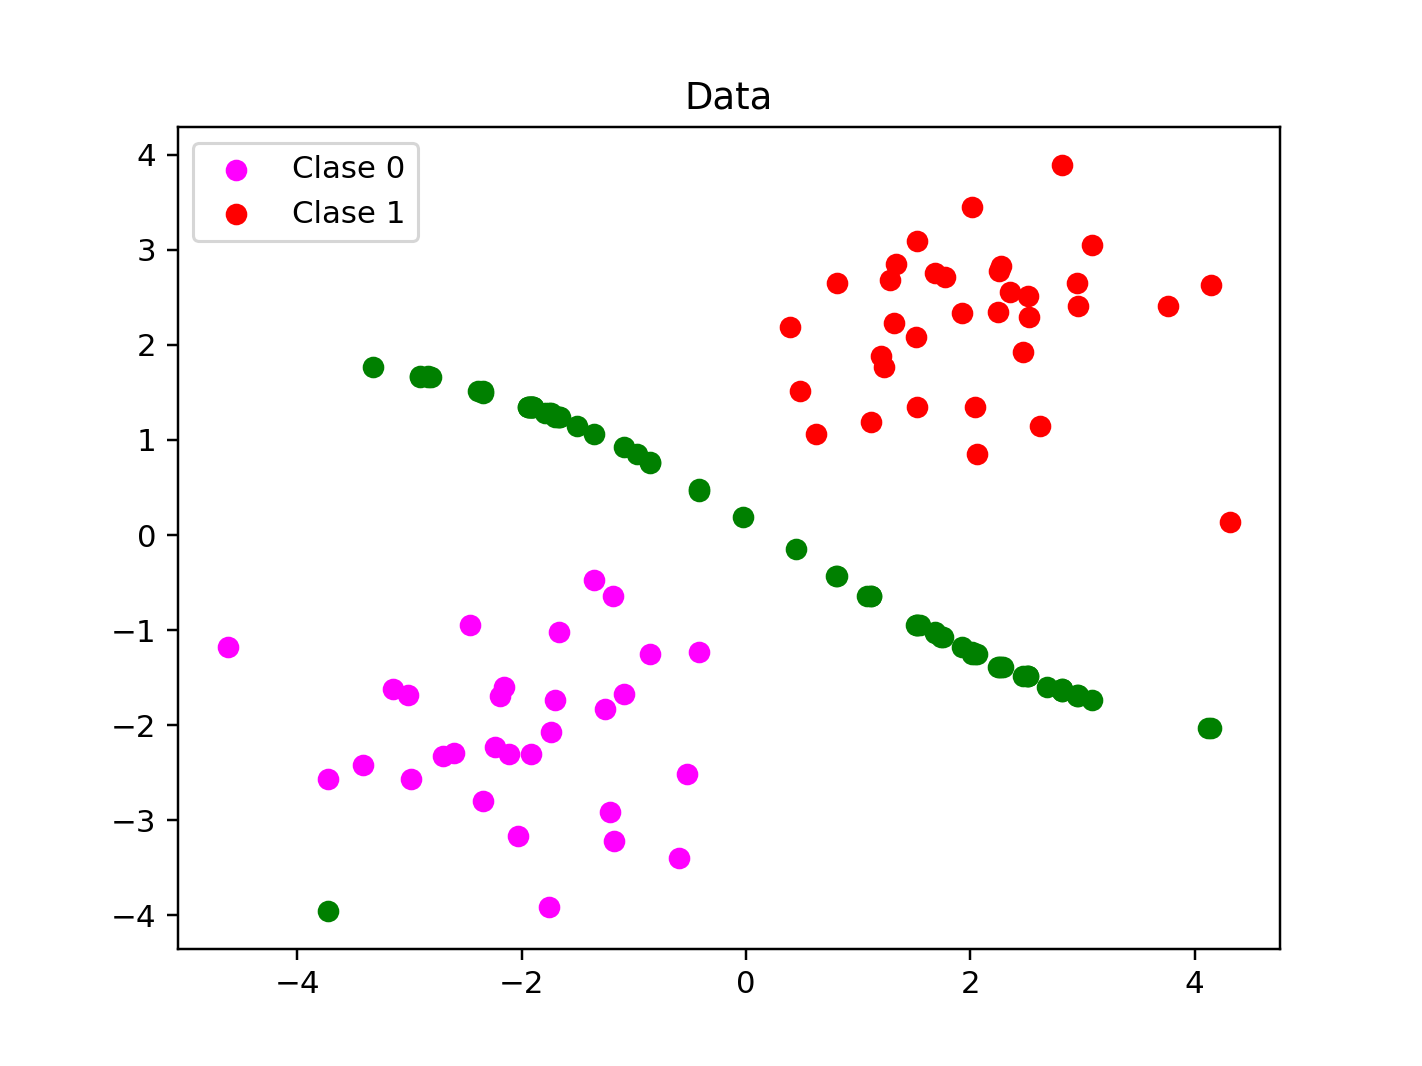

Text(0.5, 1.0, 'Data')

In [129]:
Xmz = Xm[np.where((z < 0.505) & (z > 0.495))]
Ymz = Ym[np.where((z < 0.505) & (z > 0.495))]

plt.figure()
X1=X_train[y_train == 0]
X2=X_train[y_train == 1]

plt.scatter(X1[:, 0], X1[:, 1], color = 'magenta')
plt.scatter(X2[:, 0], X2[:, 1], color = 'red')
plt.scatter(Xmz, Ymz, color = 'green')
plt.legend(['Clase 0', 'Clase 1'], loc="best")
plt.title("Data")